<a href="https://colab.research.google.com/github/Subhro-1993/Applied-Machine-Learning/blob/main/Increasing_Unemployment_In_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Libraries**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**

In [38]:
data = pd.read_csv("/content/india-unemployment-rate.csv")

# **Display Basic Info about the Data**

In [39]:
print(data.head())
print(data.describe())

   Year Unemployment Rate (%) Annual Change
0  2023                 4.17%        -0.65%
1  2022                 4.82%        -1.56%
2  2021                 6.38%        -1.48%
3  2020                 7.86%         1.35%
4  2019                 6.51%        -1.14%
             Year
count    33.00000
mean   2007.00000
std       9.66954
min    1991.00000
25%    1999.00000
50%    2007.00000
75%    2015.00000
max    2023.00000


In [40]:
print(data.columns)

Index(['Year', 'Unemployment Rate (%)', 'Annual Change'], dtype='object')


In [41]:
data.columns = data.columns.str.strip() #Removing extra space in the column names

In [42]:
# Rename columns to ensure they match expected names
data.rename(columns={'year': 'Year', 'unemployment_rate (%)': 'Unemployment_Rate'}, inplace=True)

In [43]:
print(data.columns)

Index(['Year', 'Unemployment Rate (%)', 'Annual Change'], dtype='object')


# **Line Plot - Year-wise Unemployment Rate**

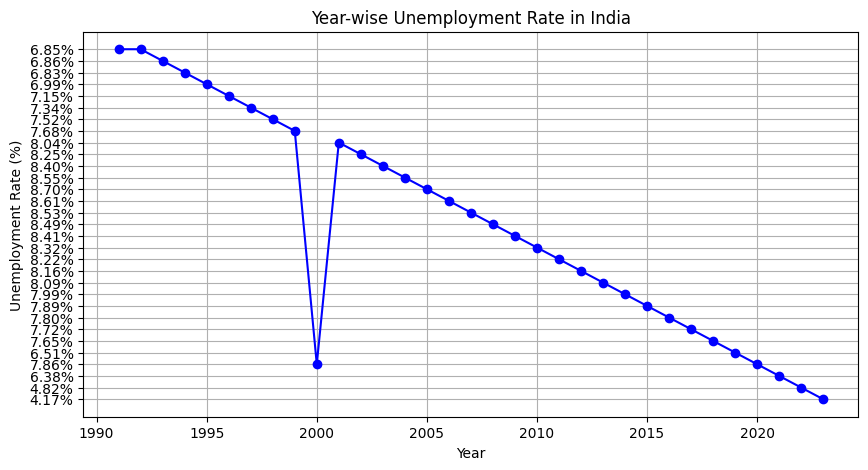

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(data['Year'], data['Unemployment Rate (%)'], marker='o', color='b')
plt.title("Year-wise Unemployment Rate in India")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()

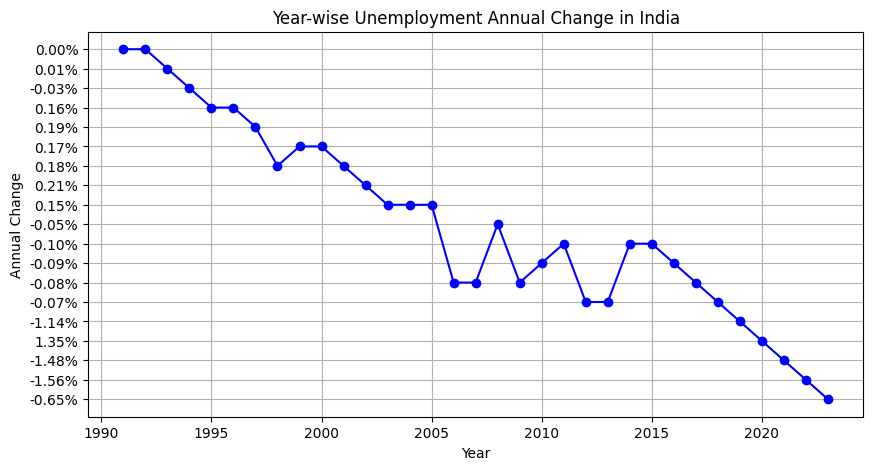

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(data['Year'], data['Annual Change'], marker='o', color='b')
plt.title("Year-wise Unemployment Annual Change in India")
plt.xlabel("Year")
plt.ylabel("Annual Change")
plt.grid(True)
plt.show()

# **Bar Chart - Yearly Unemployment Rate**

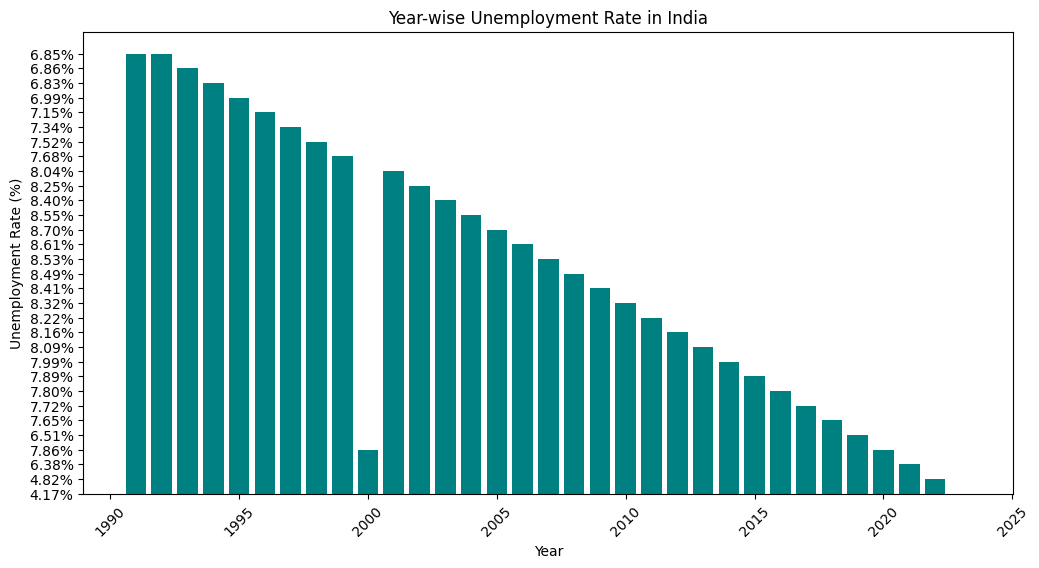

In [46]:
plt.figure(figsize=(12, 6))
plt.bar(data['Year'], data['Unemployment Rate (%)'], color='teal')
plt.title("Year-wise Unemployment Rate in India")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()

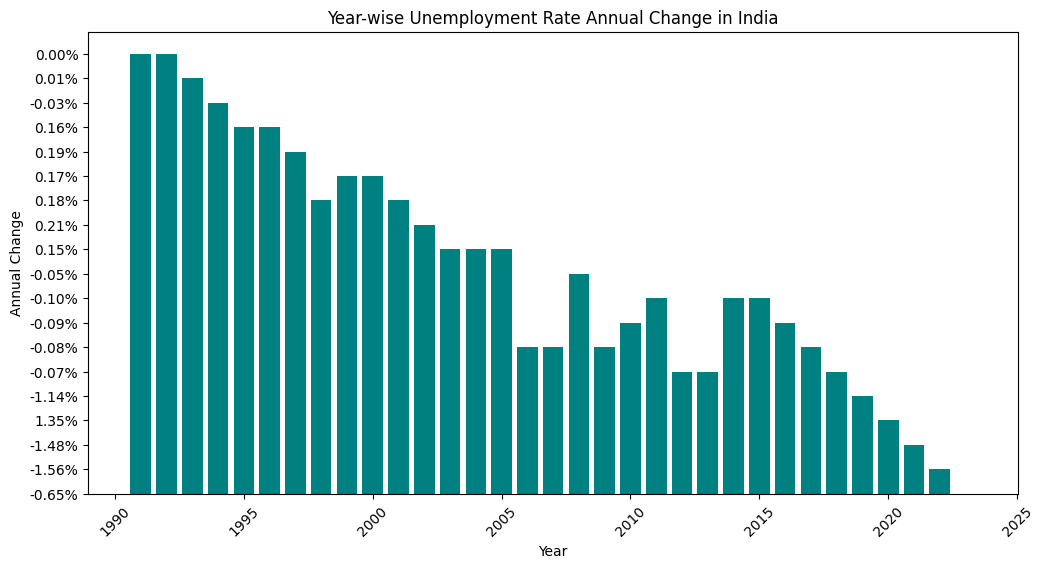

In [51]:
plt.figure(figsize=(12, 6))
plt.bar(data['Year'], data['Annual Change'], color='teal')
plt.title("Year-wise Unemployment Rate Annual Change in India")
plt.xlabel("Year")
plt.ylabel("Annual Change")
plt.xticks(rotation=45)
plt.show()

# **Moving Average - Smoothing Trends**

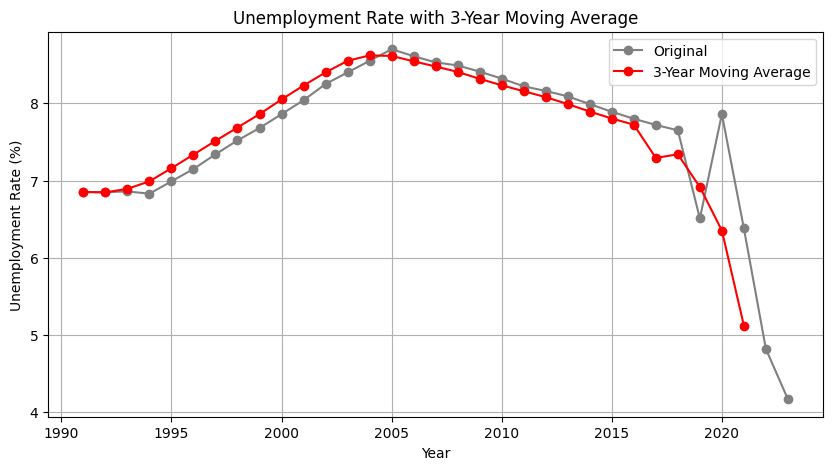

In [49]:
data['Unemployment Rate (%)'] = data['Unemployment Rate (%)'].str.rstrip('%').astype(float)
data['Moving_Avg'] = data['Unemployment Rate (%)'].rolling(window=3).mean()
plt.figure(figsize=(10, 5))
plt.plot(data['Year'], data['Unemployment Rate (%)'], marker='o', color='gray', label="Original")
plt.plot(data['Year'], data['Moving_Avg'], marker='o', color='red', label="3-Year Moving Average")
plt.title("Unemployment Rate with 3-Year Moving Average")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

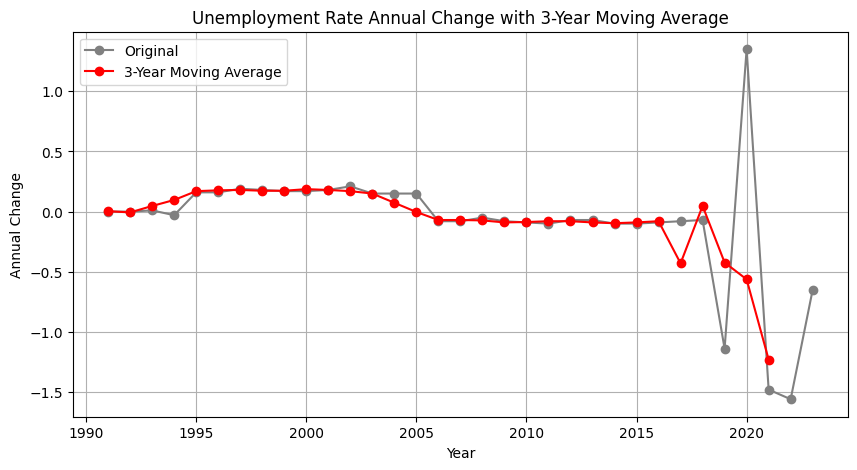

In [52]:
data['Annual Change'] = data['Annual Change'].str.rstrip('%').astype(float)
data['Moving_Avg'] = data['Annual Change'].rolling(window=3).mean()
plt.figure(figsize=(10, 5))
plt.plot(data['Year'], data['Annual Change'], marker='o', color='gray', label="Original")
plt.plot(data['Year'], data['Moving_Avg'], marker='o', color='red', label="3-Year Moving Average")
plt.title("Unemployment Rate Annual Change with 3-Year Moving Average")
plt.xlabel("Year")
plt.ylabel("Annual Change")
plt.legend()
plt.grid(True)
plt.show()

# **Analyzing Potential Causes of Unemployment**

To suggest solutions, we can analyze how different factors (like GDP, education level, inflation) might correlate with unemployment. If we have access to additional data on these factors, we could create a ML model to identify which factors most affect unemployment.

# **Load and Merge GDP Datasets with Unemployment Datasets**

In [57]:
gdp_data = pd.read_csv("/content/GDP.csv")
merged_data = pd.merge(data, gdp_data, on="Year")
print(merged_data.head())

   Year  Unemployment Rate (%)  Annual Change  Moving_Avg       GDP  \
0  2023                   4.17          -0.65         NaN  7.583971   
1  2022                   4.82          -1.56         NaN  6.987039   
2  2021                   6.38          -1.48   -1.230000  9.689592   
3  2020                   7.86           1.35   -0.563333 -5.777725   
4  2019                   6.51          -1.14   -0.423333  3.871437   

   Education_Index  Inflation  
0             77.0   5.649143  
1             76.0   6.699034  
2              NaN   5.131407  
3              NaN   6.623437  
4              NaN   3.729506  


# **Correlation Analysis**

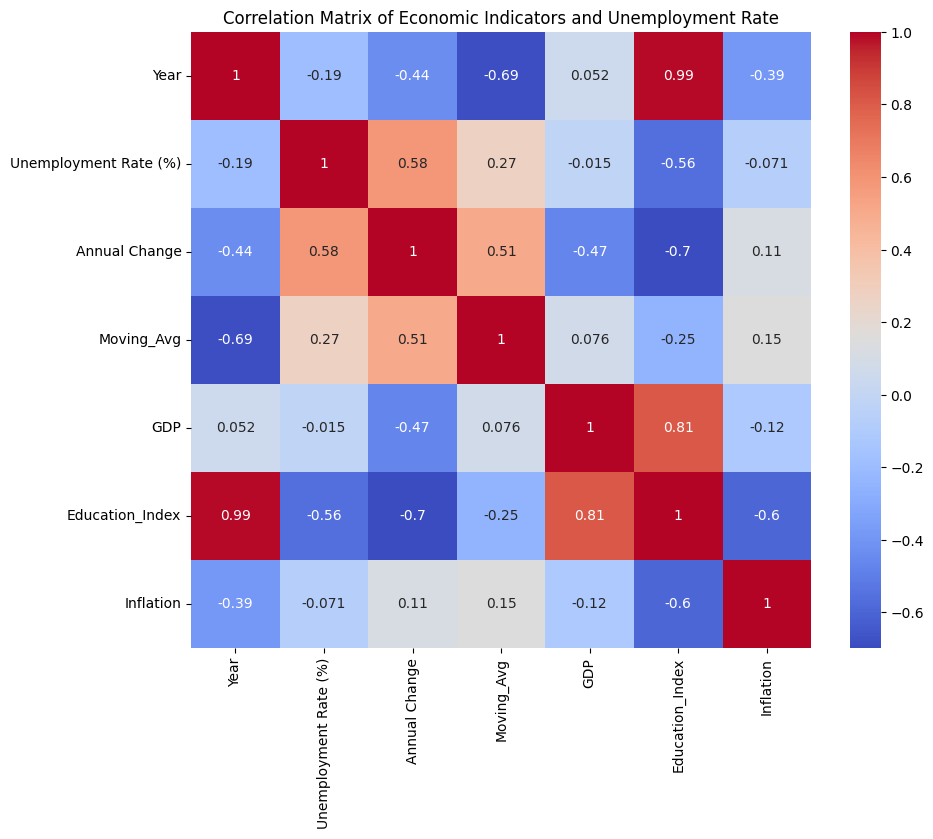

In [58]:
correlation_matrix = merged_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Economic Indicators and Unemployment Rate")
plt.show()

# **Regression Model to Predict Unemployment and Suggest Solutions:**

In [59]:
#A linear regression model could help predict unemployment based on economic indicators.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [61]:
# Assuming GDP and other features exist in the merged_data
X = merged_data[['GDP', 'Education_Index', 'Inflation']]  # Example predictors
y = merged_data['Unemployment Rate (%)']

In [63]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Assuming 'merged_data' is your Pandas DataFrame
merged_data = merged_data.dropna(subset=['GDP', 'Education_Index', 'Inflation'])

# Now re-create X and y, and split the data again
X = merged_data[['GDP', 'Education_Index', 'Inflation']]
y = merged_data['Unemployment Rate (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (should work now)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 18.892787228312407


In [68]:
# Display coefficients to suggest solutions
for feature, coef in zip(X.columns, model.coef_):
    print(f"Impact of {feature} on Unemployment Rate: {coef:.2f}")

Impact of GDP on Unemployment Rate: 0.17
Impact of Education_Index on Unemployment Rate: 0.03
Impact of Inflation on Unemployment Rate: -0.02


# **Interpretation of Results for Solutions**

Based on the regression model coefficients, you could identify which factors have the strongest impact on unemployment:


1.   **GDP Growth**: If the coefficient is negative, boosting GDP could reduce unemployment.
2.   **Education Level**: Positive coefficients indicate that improving education levels could reduce unemployment.
3.   **Inflation Control**: If inflation is positively correlated, policies to stabilize inflation may help reduce unemployment.

This analysis can help inform policies or focus areas for reducing unemployment.